HW-1
CS-5173
Author: Ameya Deshmukh
Date: 9/9/23

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2

In [38]:
# Replace 'your_file.csv' with the actual file path
file_path = 'cancer_reg.csv'

# Read the CSV file with the specified encoding
df = pd.read_csv(file_path, encoding='latin1')

# Find the minimum value across all numeric columns
numeric_columns = df.select_dtypes(include=[np.number])
min_numeric_value = numeric_columns.min().min()
max_numeric_value = numeric_columns.max().max()


# fill nan values
for i in range(34):
    if df.iloc[:,i].isnull().any():
        df.iloc[:,i].fillna(df.iloc[:,i].mean(), inplace=True)
        
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to the 'Geography' column
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['binnedInc'] = label_encoder.fit_transform(df['binnedInc'])
# df.drop(columns = ["binnedInc"], inplace = True)


# Define the features (X) and target (y)
X = df.drop("TARGET_deathRate", axis=1)
y = df["TARGET_deathRate"]

# Apply logarithmic transformation
X = np.log1p(X)
y = np.log1p(y)


# Split the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform on the training data
X_train = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [40]:
# model 0
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
from sklearn.metrics import r2_score

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Clip predictions to not go below 4.5
y_pred = np.clip(y_pred, 4.65, 5.6)  # None means no upper limit
# Clip predictions to not go below 4.5
y_val = np.clip(y_val, 4.65, 5.6)  # None means no upper limit

# mse
mse = mean_squared_error(y_val, y_pred)
print(mse)

# Calculate R-squared (R²) score
r_squared = r2_score(y_val, y_pred)
print("R-squared (R²) Score on Validation Set:", r_squared)


0.004592877424579806
R-squared (R²) Score on Validation Set: 0.8252033424531773


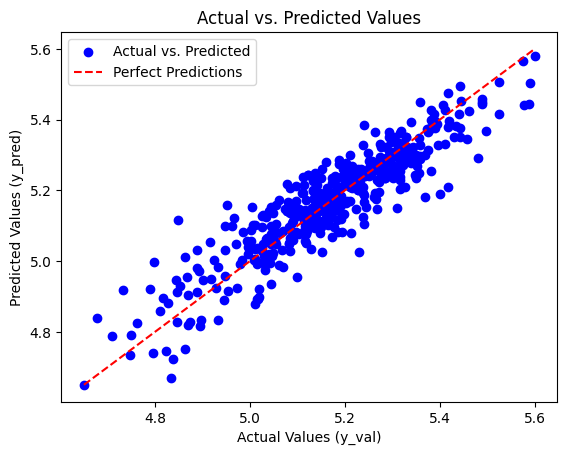

In [42]:
import matplotlib.pyplot as plt

# Assuming you have already imported your necessary libraries and performed the previous steps

# Create a scatter plot
plt.scatter(y_val, y_pred, c='blue', marker='o', label='Actual vs. Predicted')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', label='Perfect Predictions')

# Set axis labels and a title
plt.xlabel('Actual Values (y_val)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [43]:
# model 1
model1 = Sequential()
model1.add(Dense(16,activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(1))

# model 2
model2 = Sequential()
model2.add(Dense(32,activation='relu', input_dim=X_train.shape[1]))
model2.add(Dense(8,activation='relu', input_dim=X_train.shape[1]))
model2.add(Dense(1))

# model 3
model3 = Sequential()
model3.add(Dense(32,activation='relu', input_dim=X_train.shape[1]))
model3.add(Dense(16,activation='relu', input_dim=X_train.shape[1]))
model3.add(Dense(8,activation='relu', input_dim=X_train.shape[1]))
model3.add(Dense(1))

# model 4
model4 = Sequential()
model4.add(Dense(32,activation='relu', input_dim=X_train.shape[1]))
model4.add(Dense(16,activation='relu', input_dim=X_train.shape[1]))
model4.add(Dense(8,activation='relu', input_dim=X_train.shape[1]))
model4.add(Dense(4,activation='relu', input_dim=X_train.shape[1]))
model4.add(Dense(1))



In [44]:
def test_model(mdl, lr, ep, bs):

    # assign model
    model = mdl
    
    # Create an optimizer with the custom learning rate
    custom_optimizer = tf.keras.optimizers.Adam(learning_rate = lr) 

    # Compile the model with the custom optimizer
    model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, epochs = ep, batch_size = bs, validation_data=(X_val, y_val))


    # Plot training vs. validation loss
    plt.figure(figsize=(5, 3))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs. Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    from sklearn.metrics import r2_score

    # Make predictions on the validation set
    y_pred = model.predict(X_val)

    # mse
    mse = mean_squared_error(y_val, y_pred)
    print("MSE: ", mse )

    # Calculate R-squared (R²) score
    r_squared = r2_score(y_val, y_pred)
    print("R-squared (R²) Score on Validation Set:", r_squared)


Epoch 1/1000


34/34 [==============================] - 2s 6ms/step - loss: 6.6974 - val_loss: 1.6230
Epoch 2/1000
34/34 [==============================] - 0s 2ms/step - loss: 0.8989 - val_loss: 0.6116
Epoch 3/1000
34/34 [==============================] - 0s 3ms/step - loss: 0.4554 - val_loss: 0.3624
Epoch 4/1000
34/34 [==============================] - 0s 2ms/step - loss: 0.2836 - val_loss: 0.2783
Epoch 5/1000
34/34 [==============================] - 0s 2ms/step - loss: 0.2100 - val_loss: 0.1798
Epoch 6/1000
34/34 [==============================] - 0s 2ms/step - loss: 0.1489 - val_loss: 0.1384
Epoch 7/1000
34/34 [==============================] - 0s 2ms/step - loss: 0.1129 - val_loss: 0.1131
Epoch 8/1000
34/34 [==============================] - 0s 2ms/step - loss: 0.0892 - val_loss: 0.1023
Epoch 9/1000
34/34 [==============================] - 0s 2ms/step - loss: 0.0716 - val_loss: 0.0794
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0733
Epoch 11/100

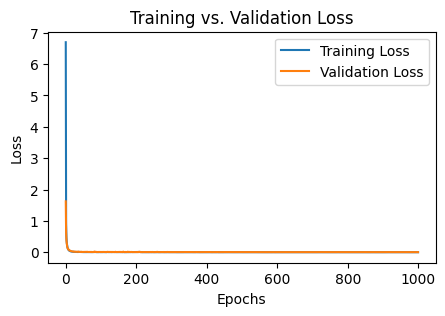

15/15 [==============================] - 0s 786us/step
MSE:  0.003123645791512516
R-squared (R²) Score on Validation Set: 0.8811196569726569


In [45]:
test_model(model4, 0.01, 1000, 64)